In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Univariate via IQR approach
In descriptive statistics, the interquartile range is a measure of statistical dispersion, which is the spread of the data. The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data. 

In [2]:
rows,cols = 100,1
data = np.random.randint(1000, size=(rows, cols))
tidx = pd.date_range('2023-01-01', periods=rows, freq='D') # daily
ts_df = pd.DataFrame(data, columns=['X'], index=tidx)

In [3]:
ts_df.head()

,X
2023-01-01,413
2023-01-02,630
2023-01-03,3
2023-01-04,121
2023-01-05,222


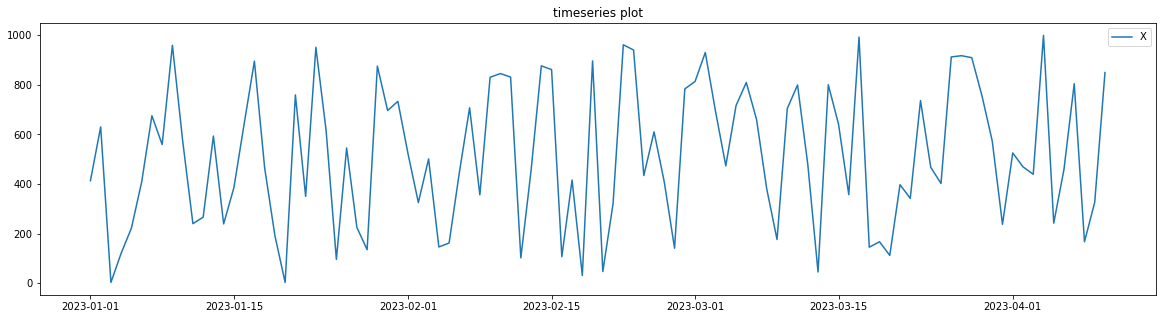

In [4]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(ax=ax,data=ts_df)
plt.title("timeseries plot")
plt.show()

In [5]:
ts_df.describe()

,X
count,100.000000
mean,513.360000
std,284.932369
min,3.000000
25%,260.000000
50%,476.000000
75%,765.000000
max,999.000000


In [6]:
IQR = stats.iqr(ts_df, interpolation = 'midpoint') # IQR range

Q1 = np.percentile(ts_df, 25, interpolation = 'midpoint') 
Q2 = np.percentile(ts_df, 50, interpolation = 'midpoint') 
Q3 = np.percentile(ts_df, 75, interpolation = 'midpoint') 

multiplier = .2 #user defined margin (default = 1.5)
low_lim = Q1 - (multiplier * IQR) # Lower limit line
up_lim = Q3 + (multiplier* IQR) # Upper limit line

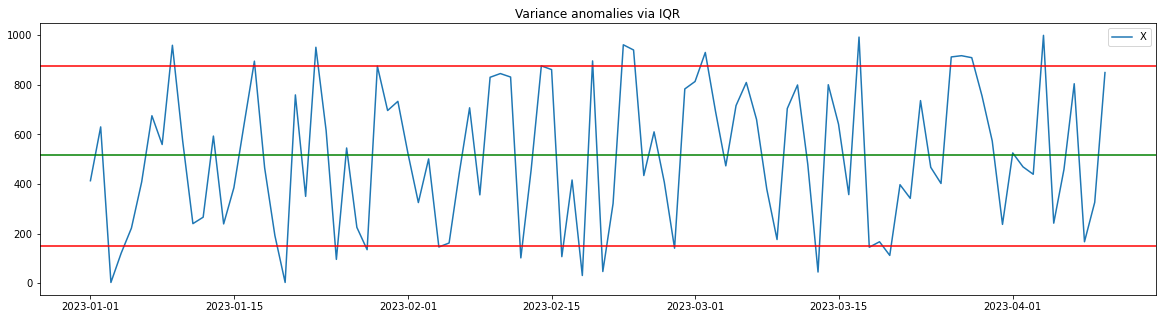

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=ts_df)
plt.axhline(y=up_lim,color="red") 
plt.axhline(y=low_lim,color="red")
plt.axhline(y=IQR,color="green")
plt.title("Variance anomalies via IQR")
plt.show()

# Multivariate / Density-based via Local outlier factor
The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors.

In [8]:
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [9]:
X,y =  make_classification(
        n_samples=1000,
        n_features=10,
        n_redundant=6,
        n_informative=4,
        random_state=42,
        n_clusters_per_class=1,
    )

In [10]:
data_df =   pd.DataFrame(X)#pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)

data_df.columns = ["".join(["X",str(i)]) for i,j in enumerate(data_df.columns)] # Let's add an X to the column names

In [11]:
data_df.head(1)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,1.362345,-0.745088,-1.086177,0.432252,1.803381,-0.26691,0.957841,0.181017,-0.643206,0.644795


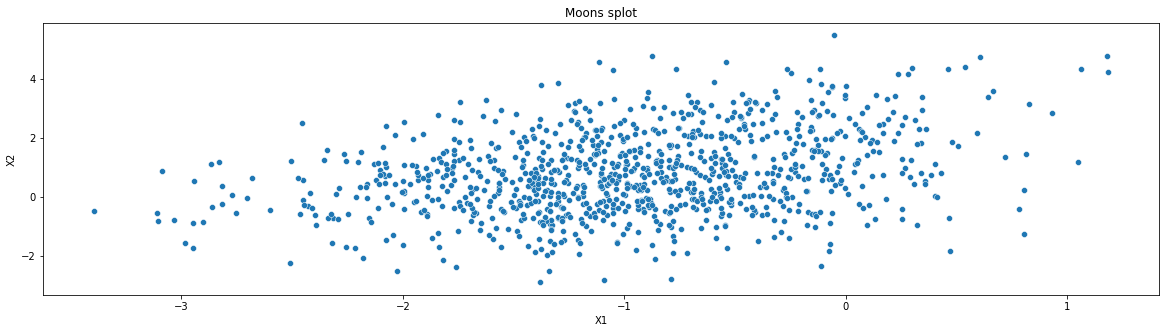

In [12]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.scatterplot(ax=ax,data=data_df,x='X1',y='X2',cmap="viridis")
plt.title("Moons splot")
plt.show()

In [13]:
outlier = LocalOutlierFactor(n_neighbors=20,novelty=False) #outlier vs novelty
scaler = StandardScaler()
X = scaler.fit_transform(data_df) # scale X 

outlier_scores = outlier.fit_predict(X) # predict outliers based on X
data_df['outlier'] = outlier_scores ==-1 #outliers have a -1 value. closer to 1 is not an outlier. 
data_df['outlier'] = data_df['outlier'].apply(lambda x: int(x)) # convert into 1 and 0

In [14]:
data_df.head(1)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,outlier
0,1.362345,-0.745088,-1.086177,0.432252,1.803381,-0.26691,0.957841,0.181017,-0.643206,0.644795,0


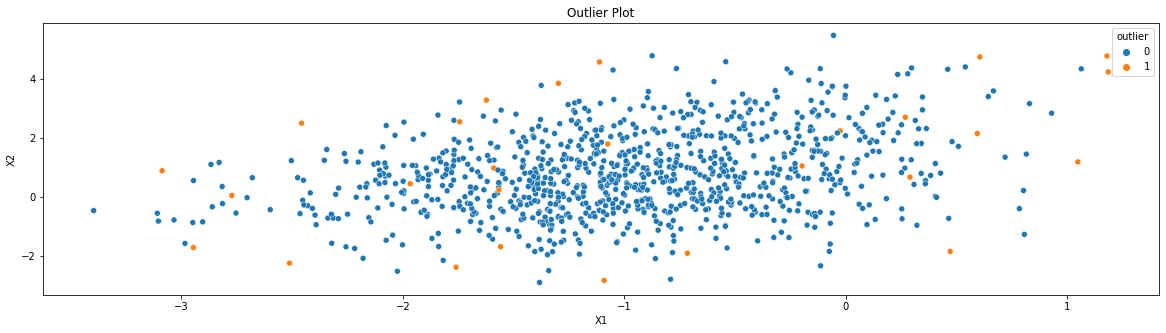

In [15]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.scatterplot(ax=ax,data=data_df,x='X1',y='X2',hue="outlier",cmap="viridis")
plt.title("Outlier Plot")
plt.show()